In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.utils.image_dataset_from_directory('E:\\dataset')

Found 2166 files belonging to 6 classes.


In [3]:
data=data.map(lambda x,y:(x/255.0,y))

In [4]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
images = batch[0]

In [5]:
for idx, img in enumerate(batch[0][:5]):
    print(f"Image {idx + 1} shape:", img.shape, "dtype:", img.dtype)


Image 1 shape: (256, 256, 3) dtype: float32
Image 2 shape: (256, 256, 3) dtype: float32
Image 3 shape: (256, 256, 3) dtype: float32
Image 4 shape: (256, 256, 3) dtype: float32
Image 5 shape: (256, 256, 3) dtype: float32


In [6]:
batch[0].max()

1.0

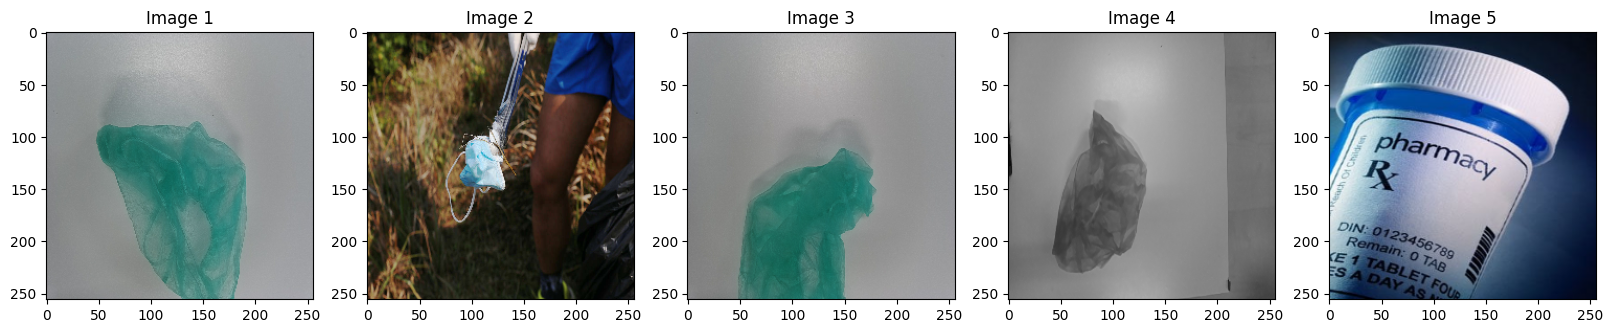

In [7]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(images[:5]):
    ax[idx].imshow(img)
    ax[idx].set_title(f"Image {idx + 1}")

plt.show()

In [8]:
train_data_tot=int(len(data)*.7)
valid_data_tot=int(len(data)*.2)
test_data_tot = len(data) - train_data_tot - valid_data_tot
data_suffled=data.shuffle(len(data),seed=45)
print(test_data_tot)


8


In [9]:
train_data=data_suffled.take(train_data_tot)
valid_data=data_suffled.skip(train_data_tot).take(valid_data_tot)
test_data=data_suffled.skip(train_data_tot+valid_data_tot).take(test_data_tot)
#len(train_data)
len(test_data)
#len(valid_data)

8

In [10]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))


C:\Users\Bijoy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,733,286 (14.24 MB)

 Trainable params: 3,733,286 (14.24 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:


# Load your dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    'E:\\dataset',
    batch_size=32,
    image_size=(256, 256),  
    shuffle=True, 
)

# Normalize and resize images
dataset = dataset.map(
    lambda x, y: (tf.image.resize(x, (256, 256)), y)
)
dataset = dataset.cache()
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


Found 2166 files belonging to 6 classes.


In [14]:
training=model.fit(train_data,epochs=3,validation_data= valid_data)

Epoch 1/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.2732 - loss: 1.6433 - val_accuracy: 0.5697 - val_loss: 1.2103
Epoch 2/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.5779 - loss: 1.0436 - val_accuracy: 0.6418 - val_loss: 0.7935
Epoch 3/3
47/47 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.6527 - loss: 0.8261 - val_accuracy: 0.6611 - val_loss: 0.7469


In [15]:
training.history

{'accuracy': [0.3902275860309601, 0.6050870418548584, 0.6854082942008972],
 'loss': [1.4785101413726807, 0.9668049812316895, 0.7882575392723083],
 'val_accuracy': [0.5697115659713745, 0.6418269276618958, 0.661057710647583],
 'val_loss': [1.2102837562561035, 0.7935482263565063, 0.7469000220298767]}

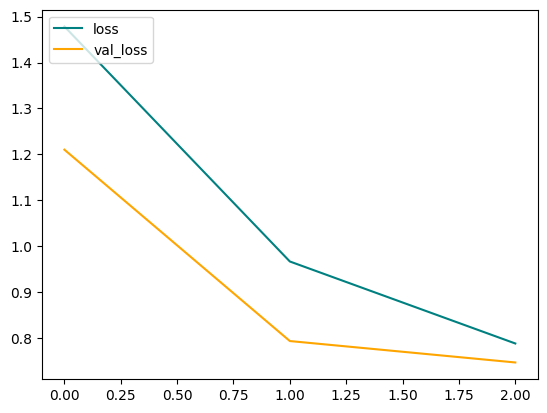

In [16]:
fig=plt.figure()
plt.plot(training.history['loss'],color='teal',label='loss')
plt.plot(training.history['val_loss'],color='orange',label='val_loss')
plt.legend(loc="upper left")
plt.show()

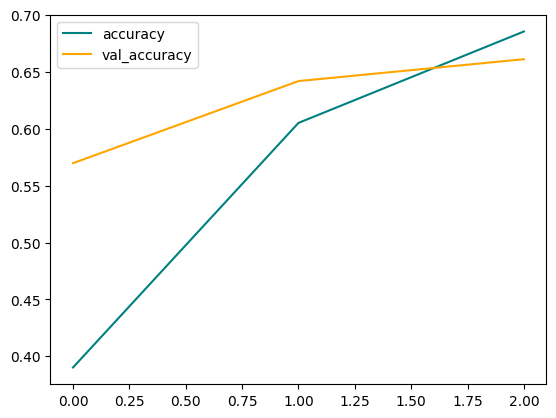

In [17]:
fig=plt.figure()
plt.plot(training.history['accuracy'],color='teal',label='accuracy')
plt.plot(training.history['val_accuracy'],color='orange',label='val_accuracy')
plt.legend(loc="upper left")
plt.show()

In [18]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [19]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()
len(test_data)

8

In [20]:

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    # Convert y to one-hot encoded format if it's not already
    if len(y.shape) == 1:
        y = tf.keras.utils.to_categorical(y, num_classes=6)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [21]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.7647059, shape=(), dtype=float32) tf.Tensor(0.55859375, shape=(), dtype=float32) tf.Tensor(0.65234375, shape=(), dtype=float32)


In [22]:
import cv2

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Bijoy\AppData\Local\Temp\ipykernel_12972\557004936.py:1: SyntaxWarning: invalid escape sequence '\s'
  img=cv2.imread('E:\syrin.jpg')


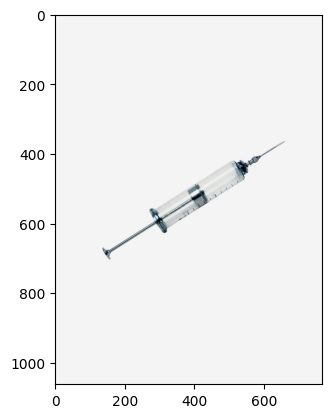

In [23]:
img=cv2.imread('E:\syrin.jpg')
plt.imshow(img)
plt.show()


In [24]:
resize=tf.image.resize(img,(256,256))


In [25]:
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)
#here i will make my bruteforce Algorithm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[1.6375928e-01 4.5893848e-02 2.5447732e-04 6.8411313e-04 2.0829324e-01
  5.8111513e-01]]


In [26]:
yhat = np.array(yhat)
predicted_class = np.argmax(yhat)
print(predicted_class)


5


In [27]:
if predicted_class==5:
    predicted_class=0
else: predicted_class=1

In [28]:

with open("D:\Bijoy\Bijoy\output.txt", "w") as file:
    file.write(str(predicted_class))


<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Bijoy\AppData\Local\Temp\ipykernel_12972\238845482.py:1: SyntaxWarning: invalid escape sequence '\B'
  with open("D:\Bijoy\Bijoy\output.txt", "w") as file:
